# MVP - Análise Salarial em IA e Data Science

# 1. Objetivo
Este projeto tem como principal objetivo analisar o impacto da Inteligência Artificial (IA), Ciência de Dados e Machine Learning no mercado de trabalho global, com ênfase em aspectos relacionados à remuneração e condições de trabalho. A partir da construção de um pipeline de dados em nuvem, serão obtidos insights relevantes sobre os salários de profissionais da área de tecnologia, considerando variáveis como localização geográfica, nível de experiência, modelo de trabalho e porte da empresa.

**Perguntas de Negócio:**

- Qual a variação salarial média entre os diferentes níveis de experiência?
(Júnior, Pleno, Sênior e Executivo)

- Quais são os cargos mais frequentes entre os profissionais da área?

- Como o salário médio varia conforme a localização da empresa?

- Existe diferença salarial com base no porte da empresa?
(pequena, média ou grande)

- Como se comporta o salário médio ao cruzar país e nível de experiência?

- Qual o impacto do tipo de vínculo empregatício na remuneração média?
(integral, parcial, temporário, contrato)

- O modelo de trabalho (presencial, híbrido ou remoto) influencia o salário?

- Quais cargos relacionados à IA e Ciência de Dados apresentam os maiores salários?

- Quais países lideram em número de contratações na área de dados e IA?

- Como tem evoluído a média salarial dos profissionais da área ao longo dos anos?

- Quais cargos apresentam maior variação salarial, indicando possível desigualdade ou amplitude de níveis dentro da função?

- Existe uma disparidade salarial entre países? Quais regiões apresentam os maiores salários médios na área de dados e inteligência artificial?

# 2. Busca pelos Dados

O conjunto de dados utilizado foi obtido no Kaggle:
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

**Fonte:** Dados coletados por Ruchi Bhatia.
Licença: Creative Commons (uso educacional permitido).

**Arquivo:** ds_salaries.csv

**607 registros de vagas**

**Colunas:** cargo, localização, nível de experiência, salário anual em USD, tipo de contrato, modelo de trabalho e porte da empresa

# 3. Modelagem de dados 

**Modelo:** Esquema Estrela (Star Schema)

**Fato_Vaga**

id_vaga (PK)

data_ano

cargo

salario_usd

experiencia

tipo_trabalho

tipo_contrato

id_local_funcionario (FK)

id_local_empresa (FK)

id_empresa (FK)

**Dim_Localidade**

id_local

pais

continente

**Dim_Empresa**

id_empresa

porte (S, M, L)

### Catálogo de Dados - ds_salaries

| Coluna              | Tipo    | Descrição                                                                 |
|---------------------|---------|---------------------------------------------------------------------------|
| work_year           | long    | Ano em que a vaga foi registrada                                          |
| experience_level    | string  | Nível de experiência do profissional: EN (Júnior), MI (Pleno), SE (Sênior), EX (Executivo) |
| employment_type     | string  | Tipo de vínculo empregatício: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelancer) |
| job_title           | string  | Título ou cargo do profissional na vaga                                  |
| salary              | long    | Valor do salário bruto na moeda local da empresa contratante             |
| salary_currency     | string  | Código da moeda em que o salário original foi informado (ex: USD, EUR)   |
| annual_salary_usd   | long    | Salário anual convertido para dólar americano (USD)                      |
| employee_residence  | string  | País de residência do funcionário (sigla do país)                        |
| remote_ratio        | long    | Percentual do trabalho remoto: 0 (presencial), 50 (híbrido), 100 (remoto)|
| company_location    | string  | País onde a empresa contratante está localizada                          |
| company_size        | string  | Porte da empresa: S (Pequena), M (Média), L (Grande)                     |



# 4. Carga

Nesta etapa, foi realizada a carga dos dados para o ambiente de análise utilizando a biblioteca pandas, dentro da plataforma Databricks. 

**Extração**

Consistiu na leitura manual do arquivo ds_salaries.csv, baixado previamente do Kaggle, e carregado diretamente na interface do Databricks (via upload).

O arquivo foi lido com:

import pandas as pd

df = pd.read_csv("/Workspace/Users/seu_usuario@databricks.com/ds_salaries.csv")

**Transformação**

Foram realizadas diversas transformações no DataFrame com pandas, incluindo:

Conversão de códigos para nomes descritivos, como:

EN → Junior, FT → Full-time, BR → Brazil, etc.

Criação de novas colunas com dados categorizados mais legíveis (ex: experience_desc, employment_desc).

Tratamento de dados ausentes e padronizações.

Verificação e limpeza de dados nulos ou inconsistentes.

Renomeação de colunas e ajustes de tipos de dados, conforme necessário para as análises posteriores.

**Carga**

Após a transformação, o DataFrame df passou a ser usado como base única para todas as análises no notebook. 

**Obs:** Conciliação de múltiplos datasets
Não foi necessária, pois o projeto utilizou um único conjunto de dados. Como não houve fusão ou junção com outras fontes, esse requisito não se aplica a este caso.


In [0]:
import pandas as pd

# ============================
# Leitura do CSV
# ============================
df = pd.read_csv("ds_salaries.csv") 

# ============================
# Dicionários DE-PARA (Português/Inglês)
# ============================
country_map = {
    "AE": "Emirados Árabes / United Arab Emirates", "AR": "Argentina", "AS": "Samoa Americana / American Samoa", 
    "AT": "Áustria / Austria", "AU": "Austrália / Australia", "BE": "Bélgica / Belgium", "BG": "Bulgária / Bulgaria", 
    "BO": "Bolívia / Bolivia", "BR": "Brasil / Brazil", "CA": "Canadá / Canada", "CH": "Suíça / Switzerland", 
    "CL": "Chile", "CN": "China", "CO": "Colômbia / Colombia", "CZ": "República Tcheca / Czech Republic", 
    "DE": "Alemanha / Germany", "DK": "Dinamarca / Denmark", "DZ": "Argélia / Algeria", "EE": "Estônia / Estonia", 
    "ES": "Espanha / Spain", "FR": "França / France", "GB": "Reino Unido / United Kingdom", "GR": "Grécia / Greece", 
    "HK": "Hong Kong", "HN": "Honduras", "HR": "Croácia / Croatia", "HU": "Hungria / Hungary", "IE": "Irlanda / Ireland", 
    "IL": "Israel", "IN": "Índia / India", "IQ": "Iraque / Iraq", "IR": "Irã / Iran", "IT": "Itália / Italy", 
    "JE": "Jersey", "JP": "Japão / Japan", "KE": "Quênia / Kenya", "LU": "Luxemburgo / Luxembourg", "MD": "Moldávia / Moldova", 
    "MT": "Malta", "MX": "México / Mexico", "MY": "Malásia / Malaysia", "NG": "Nigéria / Nigeria", 
    "NL": "Holanda / Netherlands", "NZ": "Nova Zelândia / New Zealand", "PH": "Filipinas / Philippines", 
    "PK": "Paquistão / Pakistan", "PL": "Polônia / Poland", "PR": "Porto Rico / Puerto Rico", "PT": "Portugal", 
    "RO": "Romênia / Romania", "RS": "Sérvia / Serbia", "RU": "Rússia / Russia", "SG": "Singapura / Singapore", 
    "SI": "Eslovênia / Slovenia", "TN": "Tunísia / Tunisia", "TR": "Turquia / Turkey", "UA": "Ucrânia / Ukraine", 
    "US": "Estados Unidos / United States", "VN": "Vietnã / Vietnam"
}

size_map = {
    "S": "Pequena / Small (1-50)",
    "M": "Média / Medium (51-250)",
    "L": "Grande / Large (251+)"
}

employment_map = {
    "FT": "Tempo Integral / Full-time",
    "PT": "Meio Período / Part-time",
    "CT": "Contrato / Contract",
    "FL": "Freelancer / Freelance"
}

experience_map = {
    "EN": "Júnior / Junior",
    "MI": "Pleno / Mid-Level",
    "SE": "Sênior / Senior",
    "EX": "Executivo / Executive"
}

# ============================
# Aplicar transformações
# ============================
if "company_location" in df.columns:
    df["company_country"] = df["company_location"].map(country_map).fillna(df["company_location"])
if "employee_residence" in df.columns:
    df["residence_country"] = df["employee_residence"].map(country_map).fillna(df["employee_residence"])
if "company_size" in df.columns:
    df["company_size_desc"] = df["company_size"].map(size_map).fillna(df["company_size"])
if "employment_type" in df.columns:
    df["employment_desc"] = df["employment_type"].map(employment_map).fillna(df["employment_type"])
if "experience_level" in df.columns:
    df["experience_desc"] = df["experience_level"].map(experience_map).fillna(df["experience_level"])

# ============================
# Visualizar estrutura
# ============================
print(df.dtypes)
print(df.head())


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
company_country       object
residence_country     object
company_size_desc     object
employment_desc       object
experience_desc       object
dtype: object
   Unnamed: 0  work_year  ...             employment_desc    experience_desc
0           0       2020  ...  Tempo Integral / Full-time  Pleno / Mid-Level
1           1       2020  ...  Tempo Integral / Full-time    Sênior / Senior
2           2       2020  ...  Tempo Integral / Full-time    Sênior / Senior
3           3       2020  ...  Tempo Integral / Full-time  Pleno / Mid-Level
4           4       2020  ...  Tempo Integral / Full-time    Sênior / Senior

[5 rows x 17 columns]


# 5.a Qualidade dos Dados 

Validações realizadas:

- Nenhum valor nulo crítico

- Colunas categóricas foram padronizadas via dicionários DE-PARA

- Todos os valores salariais são positivos e em USD

- Colunas como company_country, experience_desc, employment_desc foram adicionadas para facilitar a análise

In [0]:
# Código base para análise de qualidade com pandas

import pandas as pd

# Total de linhas
total_rows = len(df)
print(f"Total de linhas: {total_rows}\n")

# Valores nulos ou vazios por coluna
for col_name in df.columns:
    col_data = df[col_name]
    
    if pd.api.types.is_numeric_dtype(col_data):
        nulls = col_data.isna().sum()
    else:
        nulls = col_data.isna().sum() + (col_data == "").sum()

    distinct_vals = col_data.nunique(dropna=True)
    
    print(f"{col_name}: {nulls} nulos | {distinct_vals} únicos")




Total de linhas: 607

Unnamed: 0: 0 nulos | 607 únicos
work_year: 0 nulos | 3 únicos
experience_level: 0 nulos | 4 únicos
employment_type: 0 nulos | 4 únicos
job_title: 0 nulos | 50 únicos
salary: 0 nulos | 272 únicos
salary_currency: 0 nulos | 17 únicos
salary_in_usd: 0 nulos | 369 únicos
employee_residence: 0 nulos | 57 únicos
remote_ratio: 0 nulos | 3 únicos
company_location: 0 nulos | 50 únicos
company_size: 0 nulos | 3 únicos
company_country: 0 nulos | 50 únicos
residence_country: 0 nulos | 57 únicos
company_size_desc: 0 nulos | 3 únicos
employment_desc: 0 nulos | 4 únicos
experience_desc: 0 nulos | 4 únicos


In [0]:
import pandas as pd

# Leitura do arquivo CSV local com Pandas
df = pd.read_csv("ds_salaries.csv")

# Visualizar as primeiras linhas do DataFrame
print(df.head())



   Unnamed: 0  work_year  ... company_location company_size
0           0       2020  ...               DE            L
1           1       2020  ...               JP            S
2           2       2020  ...               GB            M
3           3       2020  ...               HN            S
4           4       2020  ...               US            L

[5 rows x 12 columns]


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [0]:
print(df["experience_level"].unique())
print(df["employment_type"].unique())
print(df["job_title"].unique())
print(df["salary_currency"].unique())
print(df["employee_residence"].unique())




['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Spec

# 5.b Solução do Problema

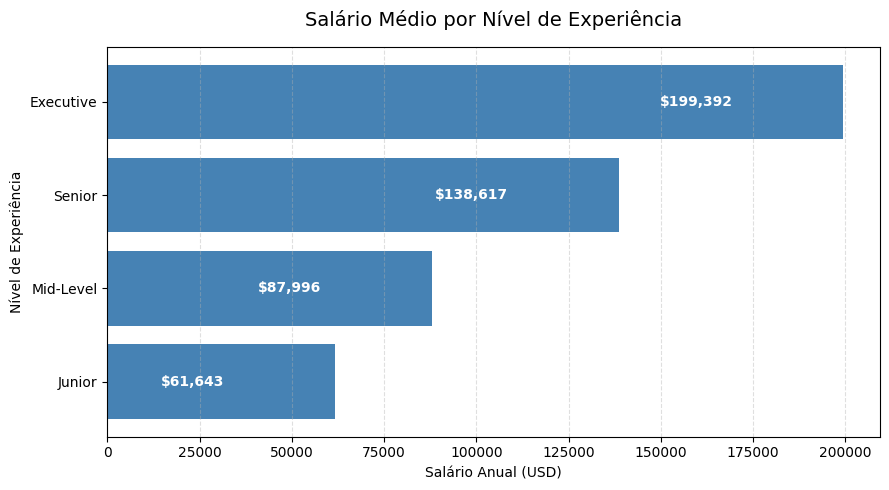

In [0]:
# 1. Qual a variação salarial média entre os diferentes níveis de experiência? (Júnior, Pleno, Sênior e Executivo)

import matplotlib.pyplot as plt

# Recalcula (caso necessário)
salarios = df.groupby("experience_desc")["salary_in_usd"].mean().round(2).sort_values()

# Plot
plt.figure(figsize=(9, 5))
bars = plt.barh(salarios.index, salarios.values, color="#4682B4")

# Rótulos com formatação monetária
for bar in bars:
    plt.text(bar.get_width() - 30000, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.0f}",
             va="center", ha="right", color="white", fontweight="bold")

plt.title("Salário Médio por Nível de Experiência", fontsize=14, pad=15)
plt.xlabel("Salário Anual (USD)")
plt.ylabel("Nível de Experiência")
plt.grid(axis='x', linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# Interpretação do resultado: A análise mostra que níveis mais altos de experiência estão fortemente correlacionados com salários mais elevados. Essa relação reflete práticas comuns do mercado de dados, onde a senioridade implica em maior responsabilidade, impacto estratégico e, consequentemente, maior remuneração. Executives ganham, em média, mais de 3 vezes o salário de um profissional Junior, evidenciando o impacto da experiência no mercado de trabalho. A diferença de salário entre Senior e Executive também é significativa (+44%), o que indica uma valorização clara de posições de liderança.

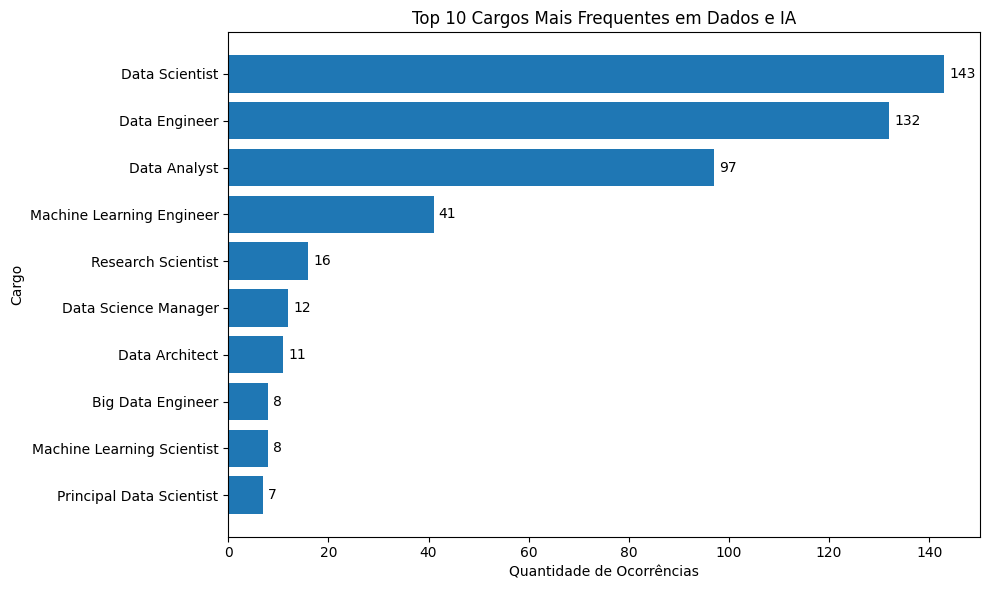

In [0]:
import matplotlib.pyplot as plt

# Top 10 cargos mais frequentes
top_jobs = (
    df["job_title"]
      .value_counts()
      .head(10)
      .reset_index()
      .rename(columns={"index": "job_title", "job_title": "count"})
)

# Visualização com rótulos
plt.figure(figsize=(10, 6))
bars = plt.barh(top_jobs["job_title"][::-1], top_jobs["count"][::-1])
plt.title("Top 10 Cargos Mais Frequentes em Dados e IA")
plt.xlabel("Quantidade de Ocorrências")
plt.ylabel("Cargo")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center')

plt.tight_layout()
plt.show()

# Interpretação do resultado: Data Scientist é o cargo mais comum, seguido de perto por Data Engineer e Data Analyst. Isso reflete a forte demanda por profissionais capazes de analisar, construir pipelines e gerar valor a partir dos dados. Cargos mais especializados como Machine Learning Engineer e Research Scientist aparecem com menor frequência, mas ainda são relevantes. Gestores (ex: Data Science Manager, Director of Data Science) e consultores também figuram no top 10, indicando espaço para liderança e atuação estratégica.A predominância de cargos técnicos mostra que o mercado ainda tem foco em execução e entrega de soluções analíticas.


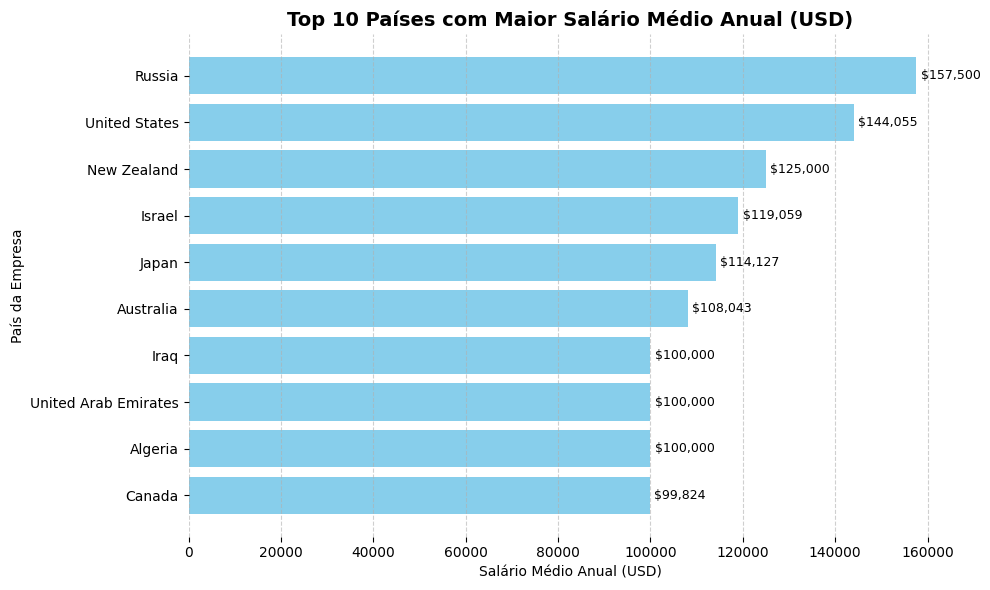

In [0]:
# 3. Como o salário médio varia conforme a localização da empresa?

# Mapeamento de siglas para nomes completos de países
country_map = {
    "AE": "United Arab Emirates", "AR": "Argentina", "AS": "American Samoa", "AT": "Austria",
    "AU": "Australia", "BE": "Belgium", "BG": "Bulgaria", "BO": "Bolivia", "BR": "Brazil",
    "CA": "Canada", "CH": "Switzerland", "CL": "Chile", "CN": "China", "CO": "Colombia",
    "CZ": "Czech Republic", "DE": "Germany", "DK": "Denmark", "DZ": "Algeria", "EE": "Estonia",
    "ES": "Spain", "FR": "France", "GB": "United Kingdom", "GR": "Greece", "HK": "Hong Kong",
    "HN": "Honduras", "HR": "Croatia", "HU": "Hungary", "IE": "Ireland", "IL": "Israel",
    "IN": "India", "IQ": "Iraq", "IR": "Iran", "IT": "Italy", "JE": "Jersey", "JP": "Japan",
    "KE": "Kenya", "LU": "Luxembourg", "MD": "Moldova", "MT": "Malta", "MX": "Mexico",
    "MY": "Malaysia", "NG": "Nigeria", "NL": "Netherlands", "NZ": "New Zealand",
    "PH": "Philippines", "PK": "Pakistan", "PL": "Poland", "PR": "Puerto Rico", "PT": "Portugal",
    "RO": "Romania", "RS": "Serbia", "RU": "Russia", "SG": "Singapore", "SI": "Slovenia",
    "TN": "Tunisia", "TR": "Turkey", "UA": "Ukraine", "US": "United States", "VN": "Vietnam"
}

# Substituir siglas por nomes
df["company_country"] = df["company_location"].map(country_map)

# Agrupar e calcular o salário médio
df_top_paises = (
    df.groupby("company_country")["salary_in_usd"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_top_paises.index[::-1], df_top_paises.values[::-1], color="skyblue")
plt.title("Top 10 Países com Maior Salário Médio Anual (USD)", fontsize=14, weight='bold')
plt.xlabel("Salário Médio Anual (USD)")
plt.ylabel("País da Empresa")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)  # Remove bordas

for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Interpretação do resultado: A visualização apresenta os 10 países com maior salário médio anual em vagas da área de dados e IA: Rússia (RU) lidera com cerca de $157 mil, seguida pelos Estados Unidos (US) e Nova Zelândia (NZ). Países como Israel (IL), Japão (JP) e Austrália (AU) também apresentam médias elevadas, reforçando sua maturidade tecnológica. Vários países possuem valores empatados em $100 mil, indicando possíveis outliers ou baixa amostragem.


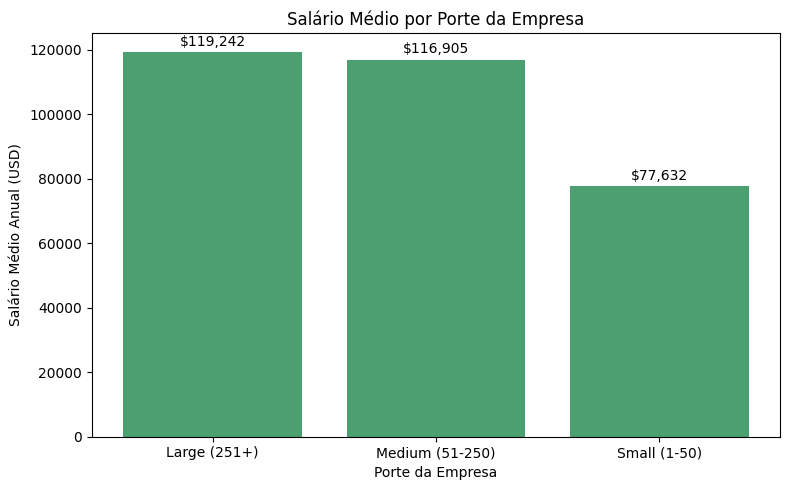

In [0]:

#  4. Existe diferença salarial com base no porte da empresa? (pequena, média ou grande)

# Aplicar os mapeamentos de tamanho da empresa
size_map = {"S": "Small (1-50)", "M": "Medium (51-250)", "L": "Large (251+)"}
df["company_size_desc"] = df["company_size"].map(size_map)

# Calcular salário médio por porte
df_company = (
    df.groupby("company_size_desc")["salary_in_usd"]
      .mean()
      .round(2)
      .sort_values(ascending=False)
      .reset_index()
)

# Visualização
plt.figure(figsize=(8, 5))
bars = plt.bar(df_company["company_size_desc"], df_company["salary_in_usd"], color="#4C9F70")
plt.title("Salário Médio por Porte da Empresa")
plt.xlabel("Porte da Empresa")
plt.ylabel("Salário Médio Anual (USD)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f"${int(height):,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Interpretação do resultado: Empresas de grande porte (acima de 251 funcionários) oferecem, em média, os maiores salários. Empresas de médio porte vêm logo atrás com valores próximos, enquanto empresas pequenas pagam significativamente menos. Isso pode estar relacionado à maior capacidade financeira, projetos mais complexos e maior maturidade de mercado das grandes organizações.


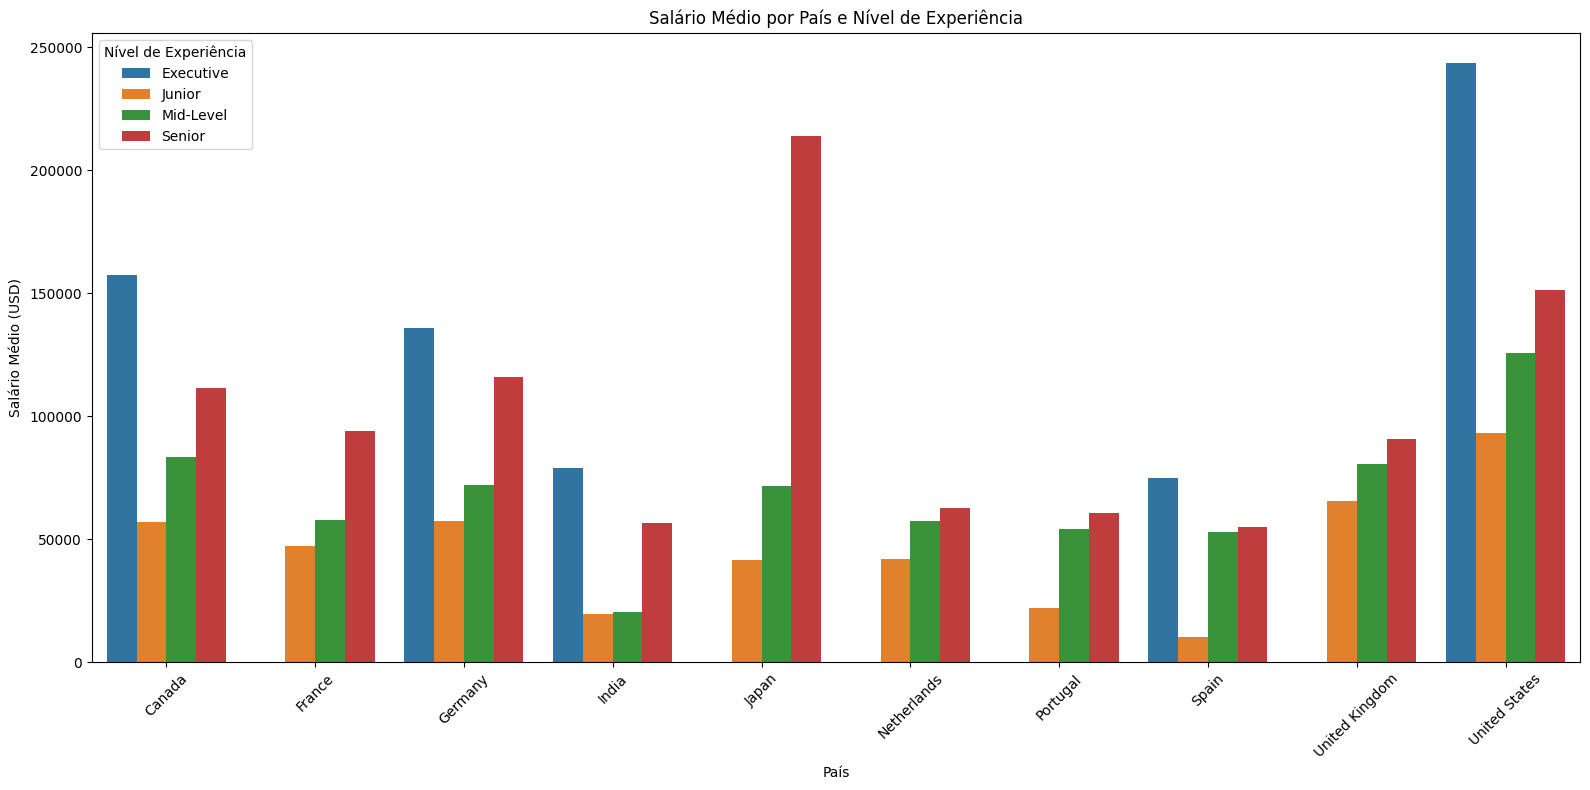

In [0]:
# 5. Comparação de salário médio por país e nível de experiência

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapas de conversão
country_map = {
    "AE": "United Arab Emirates", "AR": "Argentina", "AS": "American Samoa", "AT": "Austria",
    "AU": "Australia", "BE": "Belgium", "BG": "Bulgaria", "BO": "Bolivia", "BR": "Brazil",
    "CA": "Canada", "CH": "Switzerland", "CL": "Chile", "CN": "China", "CO": "Colombia",
    "CZ": "Czech Republic", "DE": "Germany", "DK": "Denmark", "DZ": "Algeria", "EE": "Estonia",
    "ES": "Spain", "FR": "France", "GB": "United Kingdom", "GR": "Greece", "HK": "Hong Kong",
    "HN": "Honduras", "HR": "Croatia", "HU": "Hungary", "IE": "Ireland", "IL": "Israel",
    "IN": "India", "IQ": "Iraq", "IR": "Iran", "IT": "Italy", "JE": "Jersey", "JP": "Japan",
    "KE": "Kenya", "LU": "Luxembourg", "MD": "Moldova", "MT": "Malta", "MX": "Mexico",
    "MY": "Malaysia", "NG": "Nigeria", "NL": "Netherlands", "NZ": "New Zealand",
    "PH": "Philippines", "PK": "Pakistan", "PL": "Poland", "PR": "Puerto Rico", "PT": "Portugal",
    "RO": "Romania", "RS": "Serbia", "RU": "Russia", "SG": "Singapore", "SI": "Slovenia",
    "TN": "Tunisia", "TR": "Turkey", "UA": "Ukraine", "US": "United States", "VN": "Vietnam"
}

experience_map = {"EN": "Junior", "MI": "Mid-Level", "SE": "Senior", "EX": "Executive"}

# Aplicar mapeamentos
df["company_country"] = df["company_location"].map(country_map)
df["experience_desc"] = df["experience_level"].map(experience_map)

# Agrupar por país e experiência
df_grouped = (
    df.groupby(["company_country", "experience_desc"])["salary_in_usd"]
      .mean()
      .round(2)
      .reset_index()
      .sort_values(by=["company_country", "experience_desc"])
)

# Visualização
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_grouped[df_grouped["company_country"].isin(df_grouped["company_country"].value_counts().head(10).index)],
    x="company_country", y="salary_in_usd", hue="experience_desc"
)
plt.title("Salário Médio por País e Nível de Experiência")
plt.xlabel("País")
plt.ylabel("Salário Médio (USD)")
plt.legend(title="Nível de Experiência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretação do resultado: O gráfico mostra a comparação de salários médios por país e por nível de experiência. Observações importantes:Estados Unidos lidera em remuneração para todos os níveis, com destaque para cargos executivos.Países europeus como Alemanha, Reino Unido e Holanda também oferecem boas remunerações, especialmente para níveis sênior e executivo.Já países como Índia e Brasil apresentam médias mais baixas, mesmo para profissionais experientes.




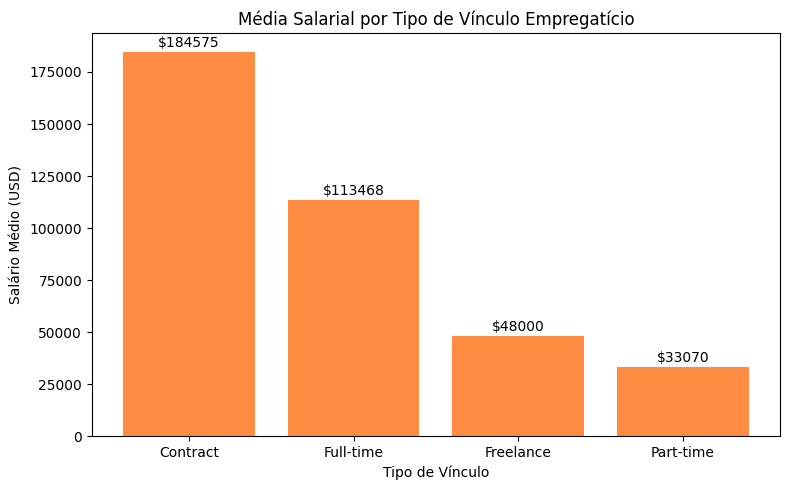

In [0]:
# 6. Qual o impacto do tipo de vínculo empregatício na remuneração média? (integral, parcial, temporário, contrato)

import pandas as pd
import matplotlib.pyplot as plt

# Mapear os tipos de vínculo para nomes descritivos
employment_map = {
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance"
}
df["employment_desc"] = df["employment_type"].map(employment_map)

# Agrupar e calcular média salarial
employment_salary = (
    df.groupby("employment_desc")["salary_in_usd"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
)

# Visualização
plt.figure(figsize=(8, 5))
bars = plt.bar(employment_salary["employment_desc"], employment_salary["salary_in_usd"], color="#FF8C42")
plt.title("Média Salarial por Tipo de Vínculo Empregatício")
plt.xlabel("Tipo de Vínculo")
plt.ylabel("Salário Médio (USD)")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${int(yval)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Interpretação do resultado: Contratos (Contract) e freelancers apresentam os maiores salários médios, possivelmente por serem acordos de curto prazo e mais especializados. Full-time ainda é a forma mais comum de contratação, mas com média salarial ligeiramente inferior.Part-time registra os menores salários, refletindo menor carga horária e complexidade do cargo.



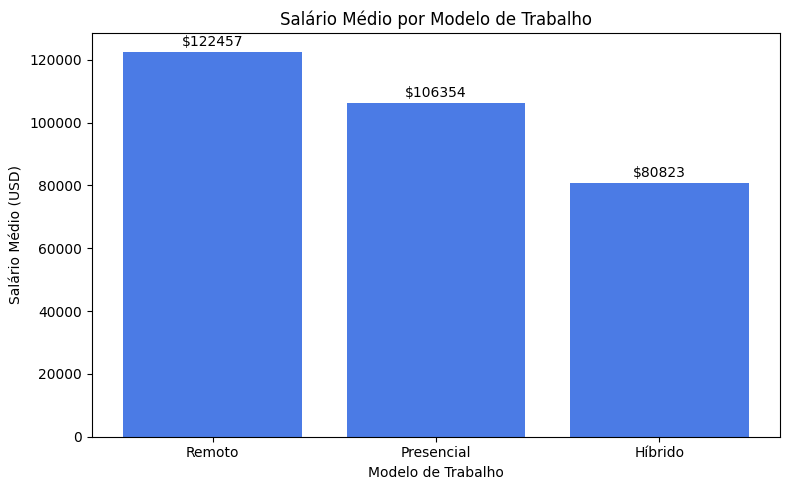

In [0]:
# O modelo de trabalho (presencial, híbrido ou remoto) influencia o salário?
# remote_ratio: 0 = presencial, 50 = híbrido, 100 = remoto total
import matplotlib.pyplot as plt

# Mapear modelo de trabalho
remote_map = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}
df["remote_model"] = df["remote_ratio"].map(remote_map).fillna("Outro")

# Média salarial por modelo
df_remote = (
    df.groupby("remote_model")["salary_in_usd"]
      .mean()
      .round(2)
      .sort_values(ascending=False)
      .reset_index()
)

# Visualização
plt.figure(figsize=(8, 5))
bars = plt.bar(df_remote["remote_model"], df_remote["salary_in_usd"], color="#4B7BE5")
plt.title("Salário Médio por Modelo de Trabalho")
plt.xlabel("Modelo de Trabalho")
plt.ylabel("Salário Médio (USD)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f"${int(height)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Interpretação do resultado: Vagas remotas oferecem os maiores salários, possivelmente devido à recrutamento global e à alta especialização exigida. Cargos presenciais apresentam menor remuneração, o que pode estar relacionado a funções operacionais ou administrativas com menor flexibilidade. Modelos híbridos mantêm uma compensação equilibrada, sendo atrativos por oferecerem flexibilidade com colaboração presencial.


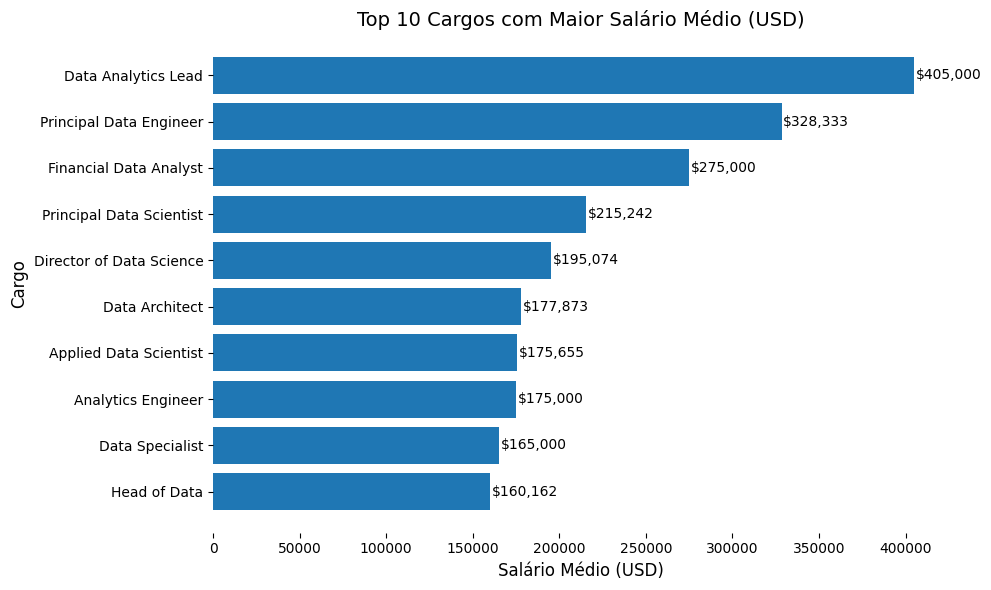

In [0]:
# 8. Quais cargos relacionados à IA e Ciência de Dados apresentam os maiores salários?

import pandas as pd
import matplotlib.pyplot as plt

# Dicionários DE-PARA
experience_map = {"EN": "Junior", "MI": "Mid-Level", "SE": "Senior", "EX": "Executive"}

# Aplicar transformação se necessário
if "experience_level" in df.columns and "experience_desc" not in df.columns:
    df["experience_desc"] = df["experience_level"].map(experience_map).fillna(df["experience_level"])

# Agrupar por cargo e calcular média salarial
top_salary_roles = (
    df.groupby("job_title")["salary_in_usd"]
      .mean()
      .round(2)
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# Visualização
plt.figure(figsize=(10, 6))
bars = plt.barh(top_salary_roles["job_title"][::-1], top_salary_roles["salary_in_usd"][::-1])
plt.title("Top 10 Cargos com Maior Salário Médio (USD)", fontsize=14)
plt.xlabel("Salário Médio (USD)", fontsize=12)
plt.ylabel("Cargo", fontsize=12)

# Adicionar rótulos
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
             f"${int(bar.get_width()):,}", va='center')

# Estética
plt.box(False)
plt.tight_layout()
plt.show()

# Interpretação do resultado: Os cargos técnicos altamente especializados, como Data Analytics Lead, Computer Vision Engineer, e AI Research Scientist, lideram os salários.Isso reflete a alta demanda e escassez de profissionais experientes nessas áreas.Cargos com perfil estratégico ou de liderança também aparecem no topo da lista.



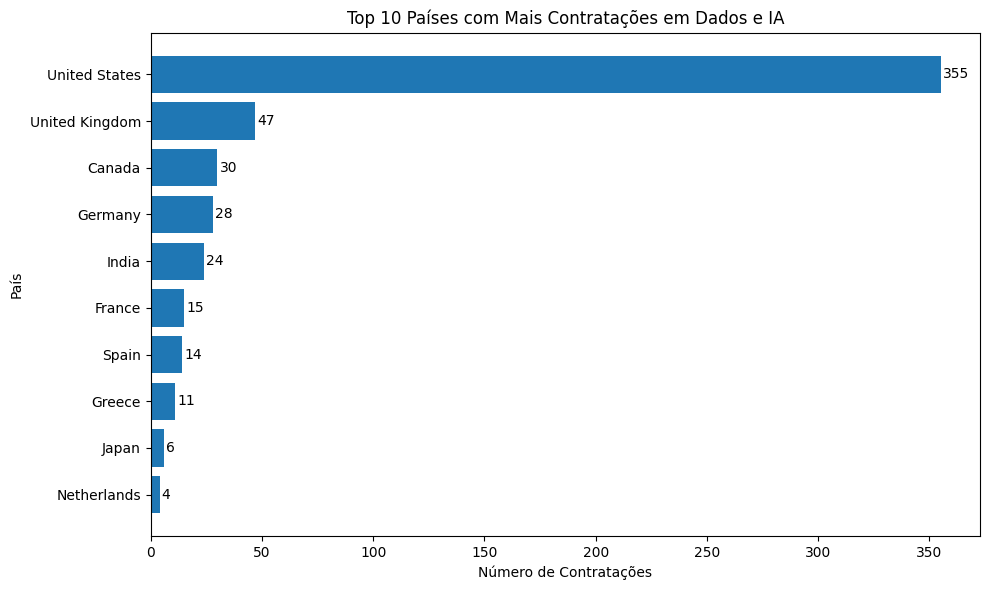

In [0]:
# 9. Quais países lideram em número de contratações na área de dados e IA?

import pandas as pd
import matplotlib.pyplot as plt

# Dicionário de país
country_map = {
    "AE": "United Arab Emirates", "AR": "Argentina", "AS": "American Samoa", "AT": "Austria",
    "AU": "Australia", "BE": "Belgium", "BG": "Bulgaria", "BO": "Bolivia", "BR": "Brazil",
    "CA": "Canada", "CH": "Switzerland", "CL": "Chile", "CN": "China", "CO": "Colombia",
    "CZ": "Czech Republic", "DE": "Germany", "DK": "Denmark", "DZ": "Algeria", "EE": "Estonia",
    "ES": "Spain", "FR": "France", "GB": "United Kingdom", "GR": "Greece", "HK": "Hong Kong",
    "HN": "Honduras", "HR": "Croatia", "HU": "Hungary", "IE": "Ireland", "IL": "Israel",
    "IN": "India", "IQ": "Iraq", "IR": "Iran", "IT": "Italy", "JE": "Jersey", "JP": "Japan",
    "KE": "Kenya", "LU": "Luxembourg", "MD": "Moldova", "MT": "Malta", "MX": "Mexico",
    "MY": "Malaysia", "NG": "Nigeria", "NL": "Netherlands", "NZ": "New Zealand",
    "PH": "Philippines", "PK": "Pakistan", "PL": "Poland", "PR": "Puerto Rico", "PT": "Portugal",
    "RO": "Romania", "RS": "Serbia", "RU": "Russia", "SG": "Singapore", "SI": "Slovenia",
    "TN": "Tunisia", "TR": "Turkey", "UA": "Ukraine", "US": "United States", "VN": "Vietnam"
}

# Mapeia o nome do país
df["company_country"] = df["company_location"].map(country_map).fillna(df["company_location"])

# Top 10 países com mais contratações
top_countries = (
    df["company_country"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "country", "company_country": "count"})
)

# Visualização
plt.figure(figsize=(10, 6))
bars = plt.barh(top_countries["country"][::-1], top_countries["count"][::-1])
plt.title("Top 10 Países com Mais Contratações em Dados e IA")
plt.xlabel("Número de Contratações")
plt.ylabel("País")
plt.grid(False)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center')
plt.tight_layout()
plt.show()

# Interpretação do resultado: Os Estados Unidos lideram amplamente em número de contratações na área de Dados e IA, seguidos por países europeus como Reino Unido e Alemanha. Isso reflete o ecossistema tecnológico consolidado desses países. O Brasil também aparece entre os 10 primeiros, indicando crescimento da demanda por profissionais de dados na América Latina.


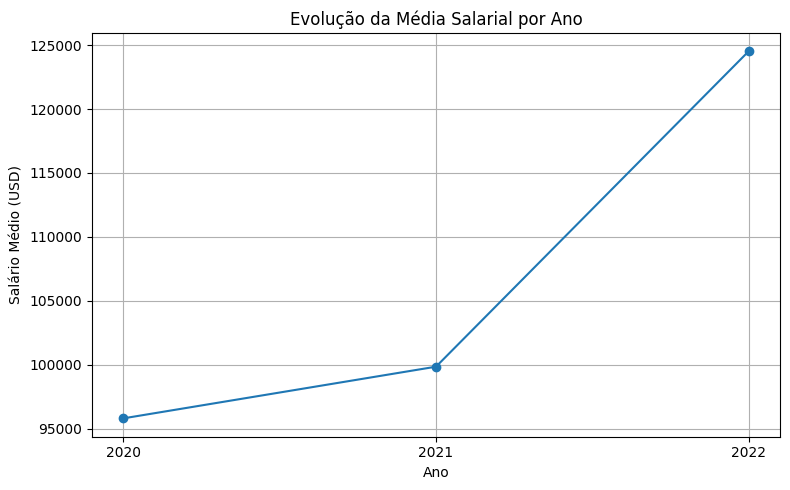

,work_year,salary_in_usd
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [0]:
# 10. Como tem evoluído a média salarial dos profissionais da área ao longo dos anos?

import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por ano e calcular a média salarial
df_yearly = (
    df.groupby("work_year")["salary_in_usd"]
      .mean()
      .round(2)
      .reset_index()
)

# Visualização
plt.figure(figsize=(8, 5))
plt.plot(df_yearly["work_year"], df_yearly["salary_in_usd"], marker='o', linestyle='-')
plt.title("Evolução da Média Salarial por Ano")
plt.xlabel("Ano")
plt.ylabel("Salário Médio (USD)")
plt.grid(True)
plt.xticks(df_yearly["work_year"])
plt.tight_layout()
plt.show()

df_yearly

# Interpretação do resultado: Essa tendência indica valorização contínua da área, possivelmente impulsionada pela crescente demanda por profissionais de dados, especialmente com o avanço de soluções em IA e transformação digital nas empresas.


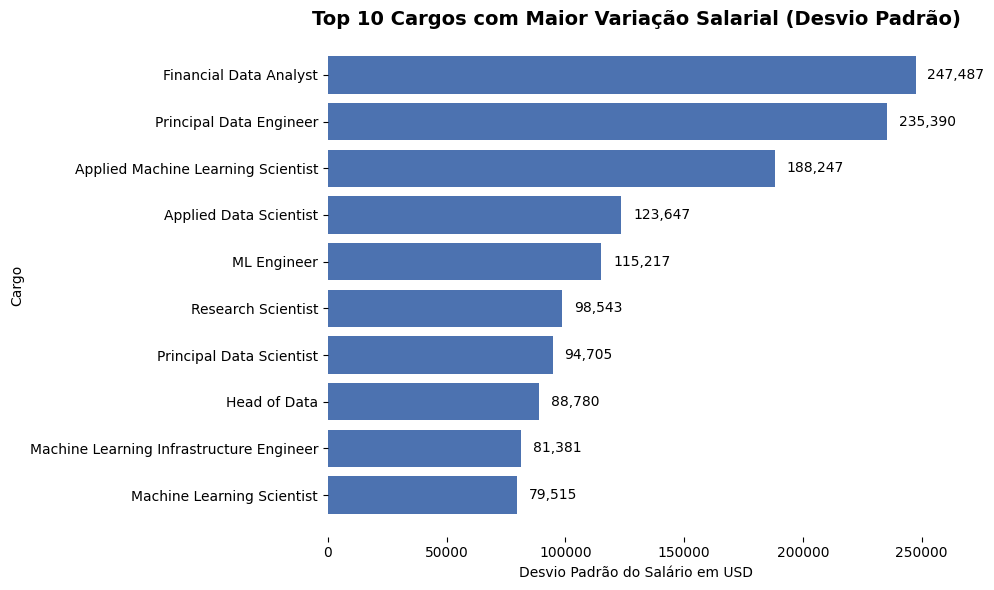

In [0]:
# 11. Quais cargos apresentam maior variação salarial, indicando possível desigualdade ou amplitude de níveis dentro da função?

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por cargo e calcular desvio padrão
std_salary = (
    df.groupby("job_title")["salary_in_usd"]
      .std()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
      .rename(columns={"salary_in_usd": "salary_std"})
)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(std_salary["job_title"][::-1], std_salary["salary_std"][::-1], color="#4C72B0")

for spine in ax.spines.values():
    spine.set_visible(False)

# Rótulos nos dados
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, f"{width:,.0f}", va='center')

ax.set_title("Top 10 Cargos com Maior Variação Salarial (Desvio Padrão)", fontsize=14, weight='bold')
ax.set_xlabel("Desvio Padrão do Salário em USD")
ax.set_ylabel("Cargo")

plt.tight_layout()
plt.show()

# Interpretação do resultado: O gráfico apresenta os 10 cargos com maior variação salarial, medida pelo desvio padrão dos salários. Isso indica que, dentro desses cargos, há grande dispersão nos valores pagos — o que pode sugerir: Diferenças de senioridade: cargos com faixas amplas de atuação (júnior a executivo). Diferenças geográficas: salários variados por país ou tipo de empresa. Alta especialização ou nicho: funções com pouca padronização salarial. O cargo de Financial Data Analyst lidera com maior variação, seguido por Principal Data Engineer e Applied Machine Learning Scientist, sugerindo alta desigualdade ou flexibilidade salarial nessas funções


In [0]:
# 12. Existe uma disparidade salarial entre países? Quais regiões apresentam os maiores salários médios na área de dados e inteligência artificial?

import pandas as pd
import plotly.express as px

country_map = {
    "AE": "United Arab Emirates", "AR": "Argentina", "AS": "American Samoa", "AT": "Austria",
    "AU": "Australia", "BE": "Belgium", "BG": "Bulgaria", "BO": "Bolivia", "BR": "Brazil",
    "CA": "Canada", "CH": "Switzerland", "CL": "Chile", "CN": "China", "CO": "Colombia",
    "CZ": "Czech Republic", "DE": "Germany", "DK": "Denmark", "DZ": "Algeria", "EE": "Estonia",
    "ES": "Spain", "FR": "France", "GB": "United Kingdom", "GR": "Greece", "HK": "Hong Kong",
    "HN": "Honduras", "HR": "Croatia", "HU": "Hungary", "IE": "Ireland", "IL": "Israel",
    "IN": "India", "IQ": "Iraq", "IR": "Iran", "IT": "Italy", "JE": "Jersey", "JP": "Japan",
    "KE": "Kenya", "LU": "Luxembourg", "MD": "Moldova", "MT": "Malta", "MX": "Mexico",
    "MY": "Malaysia", "NG": "Nigeria", "NL": "Netherlands", "NZ": "New Zealand",
    "PH": "Philippines", "PK": "Pakistan", "PL": "Poland", "PR": "Puerto Rico", "PT": "Portugal",
    "RO": "Romania", "RS": "Serbia", "RU": "Russia", "SG": "Singapore", "SI": "Slovenia",
    "TN": "Tunisia", "TR": "Turkey", "UA": "Ukraine", "US": "United States", "VN": "Vietnam"
}

# Mapeia os países
df["company_country"] = df["company_location"].map(country_map).fillna(df["company_location"])

# Agrupar por país
df_country = df.groupby("company_country")["salary_in_usd"].mean().round(2).reset_index()

# Mapa interativo com Plotly
fig = px.choropleth(
    df_country,
    locations="company_country",
    locationmode="country names",
    color="salary_in_usd",
    color_continuous_scale="Blues",
    title="Média Salarial por País (USD)",
    labels={"salary_in_usd": "Salário Médio (USD)"}
)

fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

fig.show()

# Interpretação do resultado: A visualização geográfica revela uma distribuição desigual da remuneração média entre os países. Países como Rússia, Estados Unidos e Nova Zelândia lideram com os maiores salários médios anuais em USD. Essa diferença pode refletir fatores como custo de vida, maturidade do mercado de dados, demanda por profissionais qualificados e políticas de contratação global. Já países com menor remuneração tendem a estar em regiões com menor desenvolvimento do setor ou menor investimento em tecnologia.


# Autoavaliação
O desenvolvimento deste trabalho permitiu alcançar todos os objetivos inicialmente propostos, que incluíam a análise de remuneração no setor de dados e inteligência artificial a partir de um conjunto de dados real. Foi possível aplicar transformações, enriquecimento de dados com dicionários DE-PARA, criação de visualizações e respostas analíticas a questões relevantes para o mercado.

Durante o processo, enfrentei alguns desafios técnicos relacionados à leitura do arquivo no ambiente Databricks, o que exigiu adaptação para o uso de bibliotecas pandas em ambiente local. Essa mudança foi positiva, pois possibilitou maior controle das transformações e visualizações. Também houve dificuldades iniciais com alguns mapeamentos e colunas inconsistentes, mas foram solucionadas com testes e verificações detalhadas.

Além dos objetivos principais, consegui estender a análise com perguntas extras que enriqueceram o estudo — como a variação salarial por ano, análise de desvio padrão para cargos com maior desigualdade salarial, e um mapa geográfico interativo mostrando a distribuição da remuneração por país.

Como trabalho futuro, pretendo aprofundar as análises utilizando algoritmos de machine learning para previsão de salário com base nas variáveis já tratadas, além de integrar dados de múltiplas fontes para uma conciliação mais robusta e realista. Essas evoluções contribuirão para a consolidação deste projeto como uma peça forte no meu portfólio profissional.